In [65]:
# Parameters
fecha_inicio=''
fecha_fin=''

In [72]:
import pandas as pd
import numpy
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

#Cargamos nuestros Dataset
total=pd.read_csv('total_vacunas.csv')
vacunas=pd.read_csv('fabricantes.csv')
vacunas['arrived_at']=pd.to_datetime(vacunas['arrived_at'],format='%d/%m/%Y')
total['fecha']=pd.to_datetime(total['fecha'],format='%d/%m/%Y')

In [73]:
filtro=vacunas[(vacunas['arrived_at'] >= fecha_inicio) & (vacunas['arrived_at'] <= fecha_fin)]
grupo=filtro.groupby(['vaccine'], as_index=False)['total'].sum()
print("Total de vacunas por fabricante")
print(grupo)

Total de vacunas por fabricante
              vaccine   total
0  Oxford/AstraZeneca   84000
1     Pfizer/BioNTech  274950
2             Sinovac   20000


# Generar graficas y reportes del total de personas  vacunadas.




Vacunados Primera Dosis:  14679606
Vacunados Segunda Dosis:  5131438
Restan un total de  9548168
****************************************
Existe una poblacion de  17000000 personas en el ecuador y tenemos  14679606
Nos resta un total de  2320394 por vacunar


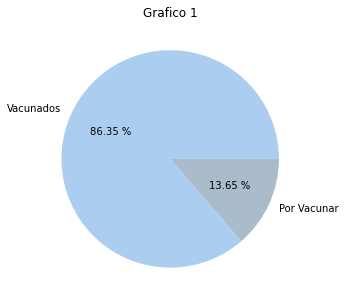

In [74]:
#Generar graficas y reportes del total de personas  vacunadas
print("Vacunados Primera Dosis: ",total['primera_dosis'].sum())
print("Vacunados Segunda Dosis: ",total['segunda_dosis'].sum())
print("Restan un total de ",(total['primera_dosis'].sum()-total['segunda_dosis'].sum()))

print("****************************************")
poblacion=17000000
print("Existe una poblacion de ",poblacion,"personas en el ecuador y tenemos ",total['primera_dosis'].sum())
print("Nos resta un total de ",poblacion-total['primera_dosis'].sum(),"por vacunar")

plt.figure(figsize=(5,5))

etiquetas = ['Vacunados', 'Por Vacunar']
colores = ['#abcdef', '#aabbcc']
plt.pie([total['primera_dosis'].sum(), poblacion-total['primera_dosis'].sum()], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Grafico 1')
plt.show()

# Generar grafico de pie por fabricante de la vacuna.


Text(0.5, 1.0, 'Vacunas Fabricante')

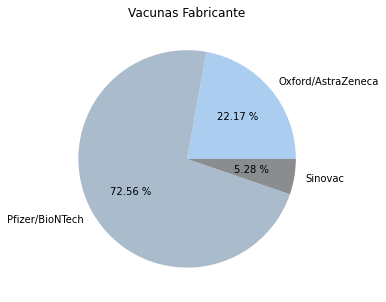

In [75]:
plt.figure(figsize = (10,5))
colores = ['#abcdef', '#aabbcc', '#8a8d8f']
plt.pie(grupo['total'],labels=grupo['vaccine'],autopct='%.2f %%', colors=colores)
plt.title('Vacunas Fabricante')

# Generar histogramas de vacunas por mes de llega y fabricante.

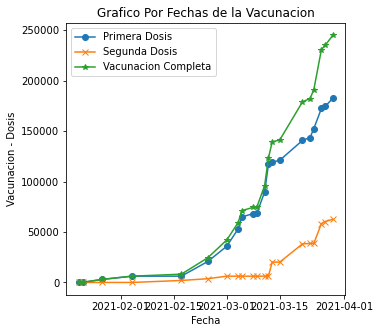

In [76]:
filtrado_fecha=total[(total['fecha'] >= fecha_inicio) & (total['fecha'] <= fecha_fin)]
plt.figure(figsize = (5,5))
plt.plot(filtrado_total['fecha'],filtrado_total['primera_dosis'],marker='o',label='Primera Dosis')
plt.plot(filtrado_total['fecha'],filtrado_total['segunda_dosis'],marker='x',label='Segunda Dosis')
plt.plot(filtrado_total['fecha'], filtrado_total['dosis_total'],marker='*',label='Vacunacion Completa')
plt.xlabel('Fecha')
plt.ylabel('Vacunacion - Dosis')
plt.title('Grafico Por Fechas de la Vacunacion')
plt.legend()


<ipython-input-77-a48938eb5b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['arrived_at']=filtro['arrived_at'].astype(str).str.slice(0,7)


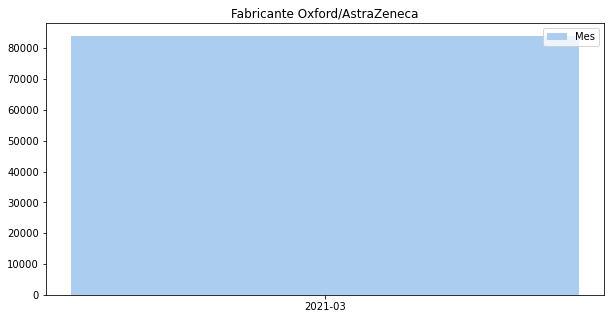

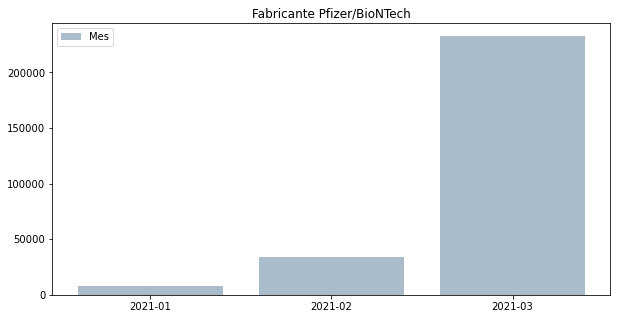

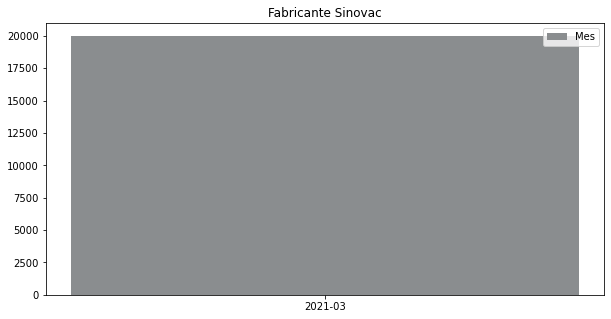

In [77]:
filtro['arrived_at']=filtro['arrived_at'].astype(str).str.slice(0,7)
f=filtro.groupby(['vaccine','arrived_at']).sum()
f.reset_index(inplace=True)
colors=['#abcdef', '#aabbcc', '#8a8d8f']
cont=0
for i in filtro.groupby(['vaccine'], as_index=False).mean()['vaccine']:
    grupomes=f.loc[(f['vaccine'] == i)]
    plt.figure(figsize = (10,5))
    plt.bar(grupomes['arrived_at'],grupomes['total'], color=colors[cont])
    plt.title('Fabricante '+i)
    plt.legend(["Mes","Mes","Mes"])
    plt.show()
    cont =cont+1